In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: CVX
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


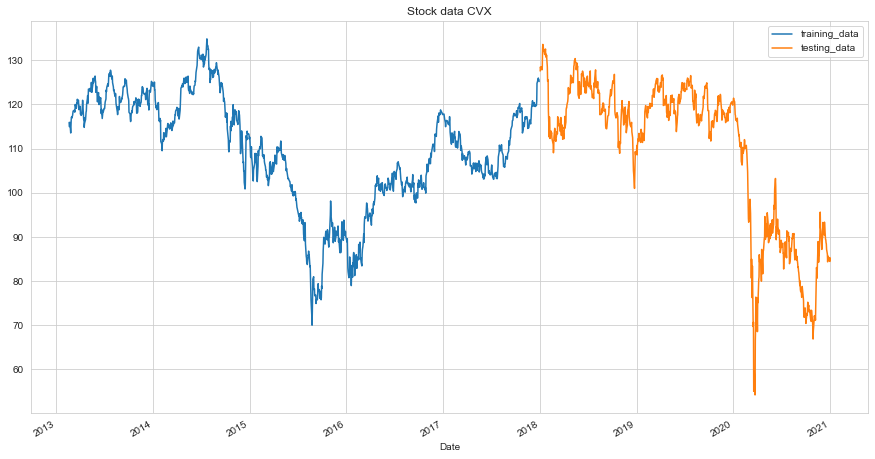

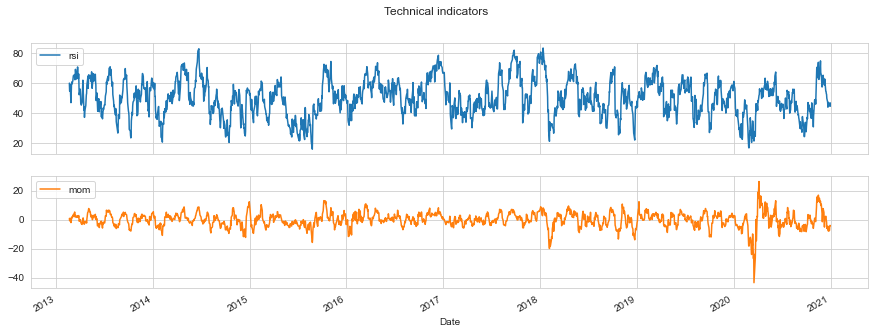

In [10]:
stock_name = 'cvx'.upper()
industry = 'Energy'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1137.81, duration: 0:00:00.378166
episode: 2/2000, episode end value: 1117.30, duration: 0:00:00.345078
episode: 3/2000, episode end value: 1109.17, duration: 0:00:00.310069
episode: 4/2000, episode end value: 1110.91, duration: 0:00:00.278096
episode: 5/2000, episode end value: 1114.74, duration: 0:00:00.299646
episode: 6/2000, episode end value: 1096.00, duration: 0:00:00.254954
episode: 7/2000, episode end value: 1107.66, duration: 0:00:00.261434
episode: 8/2000, episode end value: 1100.55, duration: 0:00:00.256947
episode: 9/2000, episode end value: 1117.54, duration: 0:00:00.243053
episode: 10/2000, episode end value: 1135.66, duration: 0:00:00.248057
episode: 11/2000, episode end value: 1129.42, duration: 0:00:00.212047
episode: 12/2000, episode end value: 1140.28, duration: 0:00:00.229052
episode: 13/2000, episode end value: 1112.26, duration: 0:00:00.223049
episode: 14/2000, episode end value: 1110.02, duration: 0:00:00.223049
episode: 15/200

episode: 117/2000, episode end value: 1094.80, duration: 0:00:00.233052
episode: 118/2000, episode end value: 1089.15, duration: 0:00:00.219050
episode: 119/2000, episode end value: 1085.98, duration: 0:00:00.231318
episode: 120/2000, episode end value: 1082.89, duration: 0:00:00.229538
episode: 121/2000, episode end value: 1088.60, duration: 0:00:00.230729
episode: 122/2000, episode end value: 1080.43, duration: 0:00:00.253059
episode: 123/2000, episode end value: 1141.69, duration: 0:00:00.256055
episode: 124/2000, episode end value: 1100.62, duration: 0:00:00.230057
episode: 125/2000, episode end value: 1133.09, duration: 0:00:00.243051
episode: 126/2000, episode end value: 1134.43, duration: 0:00:00.240056
episode: 127/2000, episode end value: 1123.90, duration: 0:00:00.233053
episode: 128/2000, episode end value: 1084.95, duration: 0:00:00.235052
episode: 129/2000, episode end value: 1083.68, duration: 0:00:00.244056
episode: 130/2000, episode end value: 1124.29, duration: 0:00:00

episode: 231/2000, episode end value: 1088.99, duration: 0:00:00.312071
episode: 232/2000, episode end value: 1080.88, duration: 0:00:00.265059
episode: 233/2000, episode end value: 1092.03, duration: 0:00:00.294068
episode: 234/2000, episode end value: 1134.46, duration: 0:00:00.353080
episode: 235/2000, episode end value: 1119.45, duration: 0:00:00.337079
episode: 236/2000, episode end value: 1131.20, duration: 0:00:00.321071
episode: 237/2000, episode end value: 1130.33, duration: 0:00:00.302072
episode: 238/2000, episode end value: 1141.63, duration: 0:00:00.346073
episode: 239/2000, episode end value: 1125.42, duration: 0:00:00.291065
episode: 240/2000, episode end value: 1091.53, duration: 0:00:00.285066
episode: 241/2000, episode end value: 1112.54, duration: 0:00:00.289064
episode: 242/2000, episode end value: 1068.49, duration: 0:00:00.255059
episode: 243/2000, episode end value: 1086.85, duration: 0:00:00.274060
episode: 244/2000, episode end value: 1085.98, duration: 0:00:00

episode: 345/2000, episode end value: 1097.35, duration: 0:00:00.417525
episode: 346/2000, episode end value: 1104.35, duration: 0:00:00.372824
episode: 347/2000, episode end value: 1098.35, duration: 0:00:00.397089
episode: 348/2000, episode end value: 1087.57, duration: 0:00:00.380090
episode: 349/2000, episode end value: 1092.12, duration: 0:00:00.449098
episode: 350/2000, episode end value: 1121.15, duration: 0:00:00.437098
episode: 351/2000, episode end value: 1098.05, duration: 0:00:00.406574
episode: 352/2000, episode end value: 1115.46, duration: 0:00:00.387085
episode: 353/2000, episode end value: 1100.75, duration: 0:00:00.370084
episode: 354/2000, episode end value: 1093.78, duration: 0:00:00.333075
episode: 355/2000, episode end value: 1104.49, duration: 0:00:00.366082
episode: 356/2000, episode end value: 1081.39, duration: 0:00:00.378086
episode: 357/2000, episode end value: 1096.14, duration: 0:00:00.402094
episode: 358/2000, episode end value: 1097.76, duration: 0:00:00

episode: 459/2000, episode end value: 1082.69, duration: 0:00:00.354085
episode: 460/2000, episode end value: 1111.59, duration: 0:00:00.479108
episode: 461/2000, episode end value: 1106.06, duration: 0:00:00.495111
episode: 462/2000, episode end value: 1107.25, duration: 0:00:00.486109
episode: 463/2000, episode end value: 1132.86, duration: 0:00:00.468105
episode: 464/2000, episode end value: 1109.06, duration: 0:00:00.449101
episode: 465/2000, episode end value: 1104.95, duration: 0:00:00.409092
episode: 466/2000, episode end value: 1109.29, duration: 0:00:00.443100
episode: 467/2000, episode end value: 1097.16, duration: 0:00:00.393089
episode: 468/2000, episode end value: 1102.54, duration: 0:00:00.509116
episode: 469/2000, episode end value: 1103.51, duration: 0:00:00.505115
episode: 470/2000, episode end value: 1096.43, duration: 0:00:00.485110
episode: 471/2000, episode end value: 1073.10, duration: 0:00:00.489111
episode: 472/2000, episode end value: 1088.15, duration: 0:00:00

episode: 573/2000, episode end value: 1095.50, duration: 0:00:00.412097
episode: 574/2000, episode end value: 1111.98, duration: 0:00:00.409089
episode: 575/2000, episode end value: 1108.35, duration: 0:00:00.397090
episode: 576/2000, episode end value: 1096.00, duration: 0:00:00.412093
episode: 577/2000, episode end value: 1134.87, duration: 0:00:00.491113
episode: 578/2000, episode end value: 1102.67, duration: 0:00:00.424101
episode: 579/2000, episode end value: 1093.26, duration: 0:00:00.363078
episode: 580/2000, episode end value: 1178.54, duration: 0:00:00.439098
episode: 581/2000, episode end value: 1101.46, duration: 0:00:00.412092
episode: 582/2000, episode end value: 1113.97, duration: 0:00:00.408091
episode: 583/2000, episode end value: 1086.08, duration: 0:00:00.372082
episode: 584/2000, episode end value: 1087.52, duration: 0:00:00.389089
episode: 585/2000, episode end value: 1092.44, duration: 0:00:00.434096
episode: 586/2000, episode end value: 1122.48, duration: 0:00:00

episode: 687/2000, episode end value: 1123.48, duration: 0:00:00.456612
episode: 688/2000, episode end value: 1119.18, duration: 0:00:00.476632
episode: 689/2000, episode end value: 1105.74, duration: 0:00:00.478105
episode: 690/2000, episode end value: 1100.99, duration: 0:00:00.467105
episode: 691/2000, episode end value: 1090.73, duration: 0:00:00.456103
episode: 692/2000, episode end value: 1135.75, duration: 0:00:00.537129
episode: 693/2000, episode end value: 1111.36, duration: 0:00:00.456102
episode: 694/2000, episode end value: 1098.47, duration: 0:00:00.401094
episode: 695/2000, episode end value: 1071.97, duration: 0:00:00.345078
episode: 696/2000, episode end value: 1118.22, duration: 0:00:00.446101
episode: 697/2000, episode end value: 1077.16, duration: 0:00:00.431099
episode: 698/2000, episode end value: 1070.05, duration: 0:00:00.396087
episode: 699/2000, episode end value: 1088.45, duration: 0:00:00.366083
episode: 700/2000, episode end value: 1123.01, duration: 0:00:00

episode: 801/2000, episode end value: 1095.18, duration: 0:00:00.443078
episode: 802/2000, episode end value: 1098.69, duration: 0:00:00.404091
episode: 803/2000, episode end value: 1093.50, duration: 0:00:00.373083
episode: 804/2000, episode end value: 1095.20, duration: 0:00:00.411095
episode: 805/2000, episode end value: 1086.61, duration: 0:00:00.411093
episode: 806/2000, episode end value: 1113.80, duration: 0:00:00.434101
episode: 807/2000, episode end value: 1092.11, duration: 0:00:00.441098
episode: 808/2000, episode end value: 1110.15, duration: 0:00:00.441099
episode: 809/2000, episode end value: 1110.28, duration: 0:00:00.433101
episode: 810/2000, episode end value: 1108.12, duration: 0:00:00.418091
episode: 811/2000, episode end value: 1103.89, duration: 0:00:00.362083
episode: 812/2000, episode end value: 1113.86, duration: 0:00:00.412094
episode: 813/2000, episode end value: 1104.70, duration: 0:00:00.406091
episode: 814/2000, episode end value: 1103.27, duration: 0:00:00

episode: 915/2000, episode end value: 1075.74, duration: 0:00:00.338077
episode: 916/2000, episode end value: 1126.14, duration: 0:00:00.408092
episode: 917/2000, episode end value: 1131.49, duration: 0:00:00.463304
episode: 918/2000, episode end value: 1116.12, duration: 0:00:00.431568
episode: 919/2000, episode end value: 1086.99, duration: 0:00:00.389090
episode: 920/2000, episode end value: 1080.97, duration: 0:00:00.384086
episode: 921/2000, episode end value: 1109.80, duration: 0:00:00.425096
episode: 922/2000, episode end value: 1081.27, duration: 0:00:00.309073
episode: 923/2000, episode end value: 1133.26, duration: 0:00:00.411095
episode: 924/2000, episode end value: 1089.47, duration: 0:00:00.365082
episode: 925/2000, episode end value: 1075.11, duration: 0:00:00.338078
episode: 926/2000, episode end value: 1078.03, duration: 0:00:00.382087
episode: 927/2000, episode end value: 1106.49, duration: 0:00:00.390113
episode: 928/2000, episode end value: 1091.89, duration: 0:00:00

episode: 1029/2000, episode end value: 1096.41, duration: 0:00:00.441102
episode: 1030/2000, episode end value: 1118.54, duration: 0:00:00.479108
episode: 1031/2000, episode end value: 1092.87, duration: 0:00:00.442098
episode: 1032/2000, episode end value: 1101.43, duration: 0:00:00.438099
episode: 1033/2000, episode end value: 1106.33, duration: 0:00:00.422098
episode: 1034/2000, episode end value: 1126.29, duration: 0:00:00.419096
episode: 1035/2000, episode end value: 1118.69, duration: 0:00:00.386086
episode: 1036/2000, episode end value: 1092.99, duration: 0:00:00.416096
episode: 1037/2000, episode end value: 1099.05, duration: 0:00:00.386089
episode: 1038/2000, episode end value: 1133.11, duration: 0:00:00.481108
episode: 1039/2000, episode end value: 1130.06, duration: 0:00:00.437099
episode: 1040/2000, episode end value: 1125.02, duration: 0:00:00.442101
episode: 1041/2000, episode end value: 1119.08, duration: 0:00:00.407092
episode: 1042/2000, episode end value: 1128.89, dur

episode: 1142/2000, episode end value: 1087.42, duration: 0:00:00.463104
episode: 1143/2000, episode end value: 1104.65, duration: 0:00:00.440099
episode: 1144/2000, episode end value: 1104.76, duration: 0:00:00.406098
episode: 1145/2000, episode end value: 1114.47, duration: 0:00:00.440094
episode: 1146/2000, episode end value: 1088.06, duration: 0:00:00.421096
episode: 1147/2000, episode end value: 1122.25, duration: 0:00:00.490110
episode: 1148/2000, episode end value: 1098.36, duration: 0:00:00.430099
episode: 1149/2000, episode end value: 1087.43, duration: 0:00:00.411091
episode: 1150/2000, episode end value: 1088.69, duration: 0:00:00.365083
episode: 1151/2000, episode end value: 1135.67, duration: 0:00:00.502112
episode: 1152/2000, episode end value: 1125.33, duration: 0:00:00.357081
episode: 1153/2000, episode end value: 1147.94, duration: 0:00:00.434097
episode: 1154/2000, episode end value: 1089.28, duration: 0:00:00.408090
episode: 1155/2000, episode end value: 1063.45, dur

episode: 1255/2000, episode end value: 1116.22, duration: 0:00:00.474107
episode: 1256/2000, episode end value: 1125.18, duration: 0:00:00.472106
episode: 1257/2000, episode end value: 1098.05, duration: 0:00:00.414095
episode: 1258/2000, episode end value: 1110.00, duration: 0:00:00.404093
episode: 1259/2000, episode end value: 1096.96, duration: 0:00:00.384086
episode: 1260/2000, episode end value: 1119.69, duration: 0:00:00.455104
episode: 1261/2000, episode end value: 1116.80, duration: 0:00:00.406090
episode: 1262/2000, episode end value: 1105.06, duration: 0:00:00.364085
episode: 1263/2000, episode end value: 1107.64, duration: 0:00:00.438099
episode: 1264/2000, episode end value: 1130.26, duration: 0:00:00.457102
episode: 1265/2000, episode end value: 1102.24, duration: 0:00:00.412093
episode: 1266/2000, episode end value: 1091.47, duration: 0:00:00.432097
episode: 1267/2000, episode end value: 1121.58, duration: 0:00:00.453103
episode: 1268/2000, episode end value: 1097.56, dur

episode: 1368/2000, episode end value: 1105.86, duration: 0:00:00.474106
episode: 1369/2000, episode end value: 1111.44, duration: 0:00:00.432104
episode: 1370/2000, episode end value: 1124.70, duration: 0:00:00.457104
episode: 1371/2000, episode end value: 1104.68, duration: 0:00:00.440100
episode: 1372/2000, episode end value: 1108.36, duration: 0:00:00.378085
episode: 1373/2000, episode end value: 1089.42, duration: 0:00:00.397088
episode: 1374/2000, episode end value: 1091.81, duration: 0:00:00.333075
episode: 1375/2000, episode end value: 1106.16, duration: 0:00:00.473108
episode: 1376/2000, episode end value: 1105.16, duration: 0:00:00.410092
episode: 1377/2000, episode end value: 1105.35, duration: 0:00:00.445100
episode: 1378/2000, episode end value: 1093.63, duration: 0:00:00.352080
episode: 1379/2000, episode end value: 1113.85, duration: 0:00:00.478111
episode: 1380/2000, episode end value: 1103.02, duration: 0:00:00.442100
episode: 1381/2000, episode end value: 1096.30, dur

episode: 1481/2000, episode end value: 1115.72, duration: 0:00:00.393090
episode: 1482/2000, episode end value: 1097.63, duration: 0:00:00.423097
episode: 1483/2000, episode end value: 1093.04, duration: 0:00:00.476105
episode: 1484/2000, episode end value: 1127.96, duration: 0:00:00.519117
episode: 1485/2000, episode end value: 1109.95, duration: 0:00:00.455103
episode: 1486/2000, episode end value: 1096.43, duration: 0:00:00.449102
episode: 1487/2000, episode end value: 1114.80, duration: 0:00:00.453101
episode: 1488/2000, episode end value: 1118.96, duration: 0:00:00.465107
episode: 1489/2000, episode end value: 1120.76, duration: 0:00:00.404091
episode: 1490/2000, episode end value: 1114.42, duration: 0:00:00.402094
episode: 1491/2000, episode end value: 1081.65, duration: 0:00:00.394087
episode: 1492/2000, episode end value: 1161.40, duration: 0:00:00.398090
episode: 1493/2000, episode end value: 1105.20, duration: 0:00:00.393090
episode: 1494/2000, episode end value: 1127.31, dur

episode: 1594/2000, episode end value: 1121.42, duration: 0:00:00.459102
episode: 1595/2000, episode end value: 1095.02, duration: 0:00:00.347083
episode: 1596/2000, episode end value: 1074.51, duration: 0:00:00.322067
episode: 1597/2000, episode end value: 1129.27, duration: 0:00:00.402089
episode: 1598/2000, episode end value: 1120.41, duration: 0:00:00.406094
episode: 1599/2000, episode end value: 1127.86, duration: 0:00:00.408091
episode: 1600/2000, episode end value: 1139.98, duration: 0:00:00.461104
episode: 1601/2000, episode end value: 1137.56, duration: 0:00:00.466106
episode: 1602/2000, episode end value: 1128.49, duration: 0:00:00.468104
episode: 1603/2000, episode end value: 1109.41, duration: 0:00:00.460104
episode: 1604/2000, episode end value: 1081.80, duration: 0:00:00.435099
episode: 1605/2000, episode end value: 1105.82, duration: 0:00:00.415096
episode: 1606/2000, episode end value: 1098.53, duration: 0:00:00.436099
episode: 1607/2000, episode end value: 1125.02, dur

episode: 1707/2000, episode end value: 1091.85, duration: 0:00:00.310074
episode: 1708/2000, episode end value: 1106.96, duration: 0:00:00.342073
episode: 1709/2000, episode end value: 1101.22, duration: 0:00:00.353081
episode: 1710/2000, episode end value: 1122.79, duration: 0:00:00.379086
episode: 1711/2000, episode end value: 1141.95, duration: 0:00:00.448102
episode: 1712/2000, episode end value: 1125.28, duration: 0:00:00.335074
episode: 1713/2000, episode end value: 1115.09, duration: 0:00:00.366083
episode: 1714/2000, episode end value: 1094.37, duration: 0:00:00.361082
episode: 1715/2000, episode end value: 1128.76, duration: 0:00:00.323073
episode: 1716/2000, episode end value: 1096.83, duration: 0:00:00.304068
episode: 1717/2000, episode end value: 1093.38, duration: 0:00:00.313072
episode: 1718/2000, episode end value: 1113.48, duration: 0:00:00.369084
episode: 1719/2000, episode end value: 1111.67, duration: 0:00:00.343078
episode: 1720/2000, episode end value: 1113.25, dur

episode: 1820/2000, episode end value: 1107.17, duration: 0:00:00.312069
episode: 1821/2000, episode end value: 1118.61, duration: 0:00:00.352080
episode: 1822/2000, episode end value: 1080.89, duration: 0:00:00.336077
episode: 1823/2000, episode end value: 1109.55, duration: 0:00:00.317077
episode: 1824/2000, episode end value: 1102.05, duration: 0:00:00.300664
episode: 1825/2000, episode end value: 1109.21, duration: 0:00:00.308113
episode: 1826/2000, episode end value: 1101.96, duration: 0:00:00.301915
episode: 1827/2000, episode end value: 1099.72, duration: 0:00:00.296131
episode: 1828/2000, episode end value: 1092.78, duration: 0:00:00.322795
episode: 1829/2000, episode end value: 1095.00, duration: 0:00:00.300069
episode: 1830/2000, episode end value: 1093.34, duration: 0:00:00.344074
episode: 1831/2000, episode end value: 1113.23, duration: 0:00:00.304066
episode: 1832/2000, episode end value: 1096.70, duration: 0:00:00.341081
episode: 1833/2000, episode end value: 1096.92, dur

episode: 1933/2000, episode end value: 1091.71, duration: 0:00:00.332075
episode: 1934/2000, episode end value: 1098.95, duration: 0:00:00.343078
episode: 1935/2000, episode end value: 1084.91, duration: 0:00:00.287064
episode: 1936/2000, episode end value: 1087.68, duration: 0:00:00.295070
episode: 1937/2000, episode end value: 1114.71, duration: 0:00:00.309065
episode: 1938/2000, episode end value: 1097.93, duration: 0:00:00.303068
episode: 1939/2000, episode end value: 1077.20, duration: 0:00:00.280065
episode: 1940/2000, episode end value: 1100.19, duration: 0:00:00.308069
episode: 1941/2000, episode end value: 1103.80, duration: 0:00:00.327072
episode: 1942/2000, episode end value: 1097.65, duration: 0:00:00.304072
episode: 1943/2000, episode end value: 1117.40, duration: 0:00:00.358079
episode: 1944/2000, episode end value: 1186.44, duration: 0:00:00.326073
episode: 1945/2000, episode end value: 1104.82, duration: 0:00:00.282073
episode: 1946/2000, episode end value: 1083.23, dur

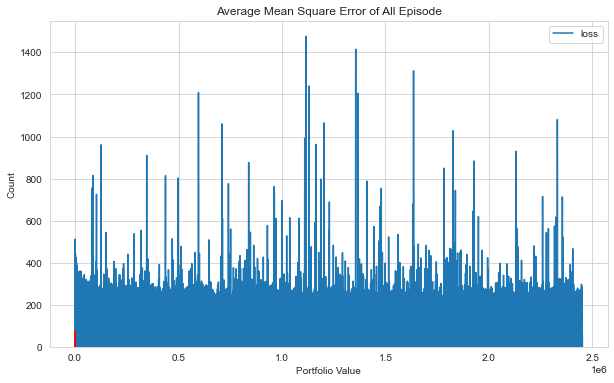

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

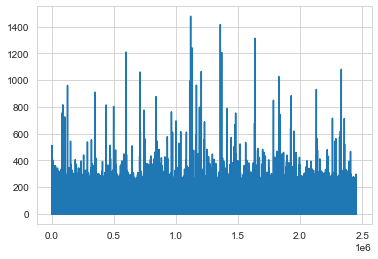

In [5]:
plt.plot(agent.model.losses)

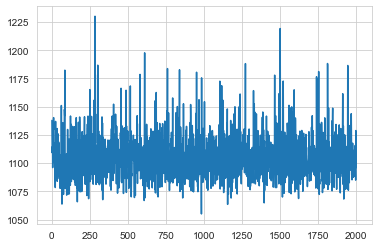

In [6]:
plt.plot(portfolio_value)

episode end value: 1027.52, duration: 0:00:00.145039
Sell: 109 times, Buy: 123 times


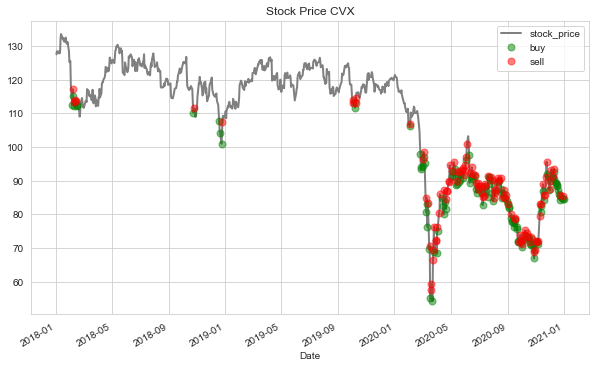

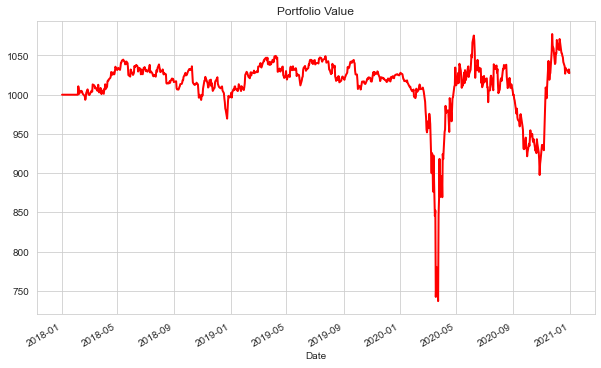

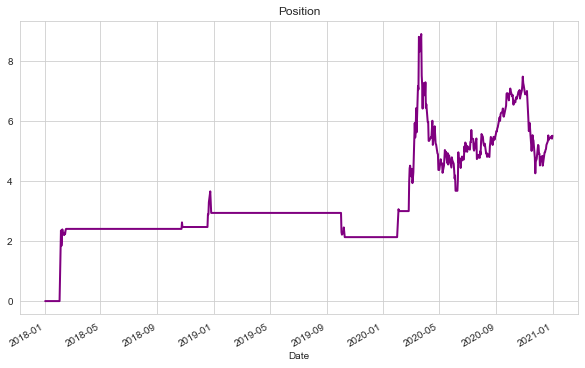

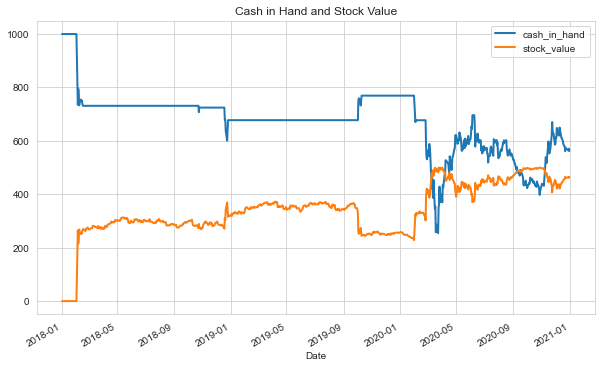

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: CVX
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 0.91 %
Volatility: 0.1934
shape ratio: -0.0099
Maximun drawdown: -29.80 %
Calmar ratio: 0.0305
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -12.85 %
Volatility (benchmark): 0.3939
shape ratio: -0.3541
Maximun drawdown: -59.42 %
Calmar ratio (benchmark): -0.2163


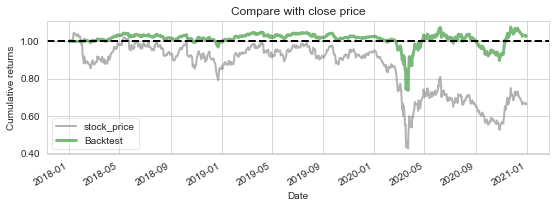

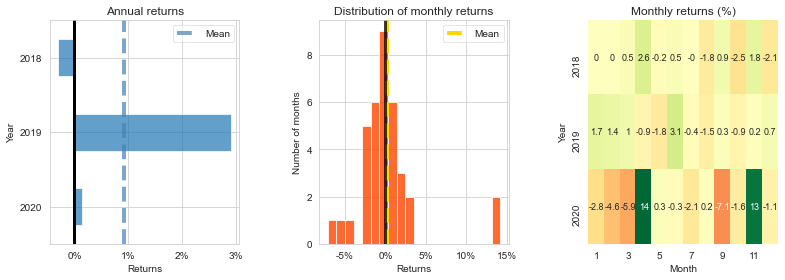

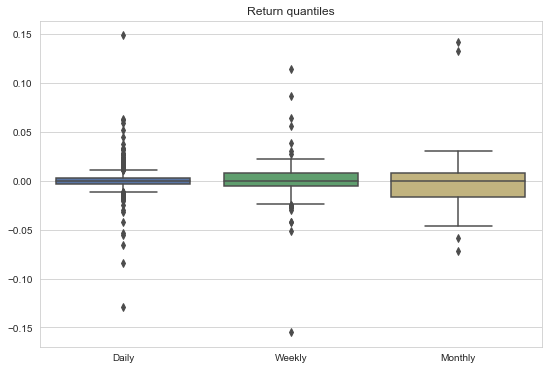

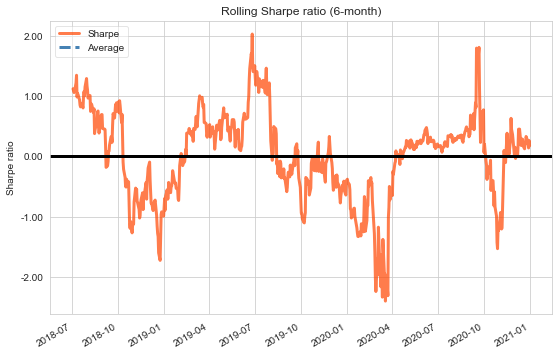

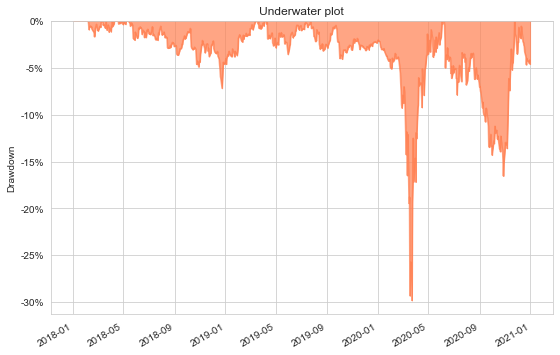

In [11]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')